Importing Clean Data

In [14]:
import pandas as pd
import datetime

pd.set_option('display.max_column', None)

game_data = pd.read_csv('cleaned_game_data.csv', index_col = 0)

#Converting release_date to datetime
game_data['release_date'] = pd.to_datetime(game_data['release_date'])
game_data

,app_id,type,name,release_date,free_to_play,developer,developer_2,developer_3,publisher_1,publisher_2,publisher_3,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Early Access,genre_Education,genre_Free to Play,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,False,PUBG Corporation,NaN,NaN,PUBG Corporation,NaN,NaN,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,570,game,Dota 2,2013-07-09,True,Valve,NaN,NaN,Valve,NaN,NaN,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,730,game,Counter-Strike: Global Offensive,2012-08-21,True,Valve,Hidden Path Entertainment,NaN,Valve,NaN,NaN,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359550,game,Tom Clancy's Rainbow Six Siege,2015-12-01,False,Ubisoft Montreal,NaN,NaN,Ubisoft,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,34000,advertising,Football Manager 2010,2009-10-29,True,Sports Interactive,NaN,NaN,SEGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,202480,NaN,Skyrim Creation Kit,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,429050,game,Feed and Grow: Fish,2016-01-08,False,Old B1ood,NaN,NaN,Greens s.r.o.,NaN,NaN,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1998,209650,game,Call of Duty: Advanced Warfare,2014-11-03,False,Sledgehammer Games,Raven Software,NaN,Activision,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Visualizations

Text(0.5, 1.0, 'Monthly Graph')

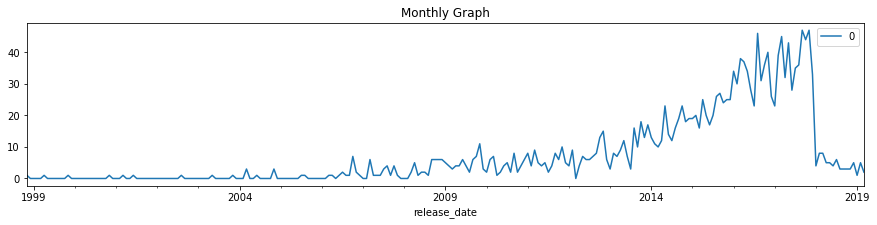

In [10]:
releases = pd.DataFrame()
releases.index = game_data['release_date']
releases[0] = 1

#releases
monthly = releases.groupby(pd.Grouper(freq='M')).sum()

graph = monthly.plot(kind='line', figsize=(15,3))
graph.set_title('Monthly Graph')

Text(0.5, 1.0, 'Yearly Graph')

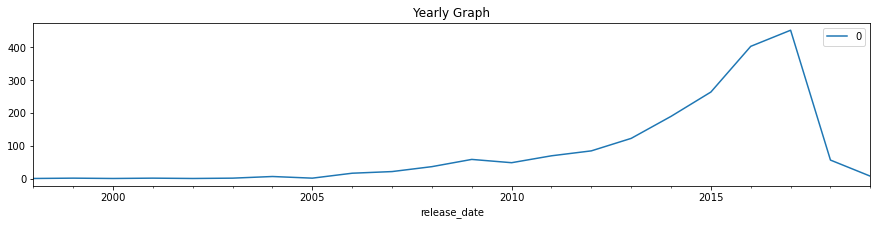

In [12]:
yearly = releases.groupby(pd.Grouper(freq='Y')).sum()
graph = yearly.plot(kind='line', figsize=(15,3))
graph.set_title('Yearly Graph')

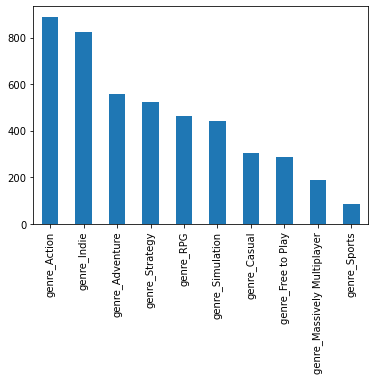

In [37]:
genre_df = game_data.filter(regex='^genre',axis=1) #Order-by genre
genre_df = genre_df.aggregate(func='sum') #Counting total games per genre
genre_df = genre_df.sort_values(ascending = False) #Ordering by # of games in genre
genre_df = genre_df.head(10)  #Selecting top 10

genre_bar = genre_df.plot(kind='bar')